# ML LAB EXERCISE 7

## Tejaswini Uma Sudhir | CSE IoT - B | 21011102103

### Use the given dataset and implement K-Means from scratch and use the sklearn K-Means implementation. Compare the results of both the implementations and write your inferences in the ipynb file itself.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv(r"C:\Users\TEJU\Downloads\data (1).csv")

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
class KMeansScratch:
    def __init__(self, n_clusters, max_iters=300):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def assign_clusters(self, X, centroids):
        
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, clusters):
        
        centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def fit(self, X):
        
        centroids = self.initialize_centroids(X)
        
        # Main loop
        for _ in range(self.max_iters):
            
            clusters = self.assign_clusters(X, centroids)
            
            
            new_centroids = self.update_centroids(X, clusters)
            
            
            if np.allclose(new_centroids, centroids):
                break
                
            centroids = new_centroids
        
        self.cluster_centers_ = centroids
        self.labels_ = clusters

    def predict(self, X):
        
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

In [38]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [39]:
kmeans_scratch = KMeansScratch(n_clusters=5)

In [40]:
kmeans_scratch.fit(X)

In [41]:
centroids_scratch = kmeans_scratch.cluster_centers_
labels_scratch = kmeans_scratch.labels_

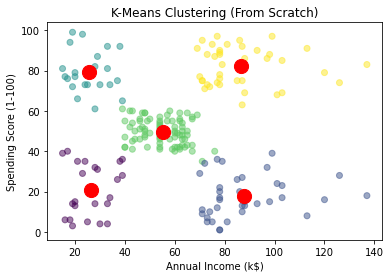

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap='viridis', alpha=0.5)
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], marker='o', s=200, color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (From Scratch)')
plt.show()

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans_sklearn = KMeans(n_clusters=5)

In [45]:
kmeans_sklearn.fit(X)

C:\Users\TEJU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [46]:
centroids_sklearn = kmeans_sklearn.cluster_centers_
labels_sklearn = kmeans_sklearn.labels_

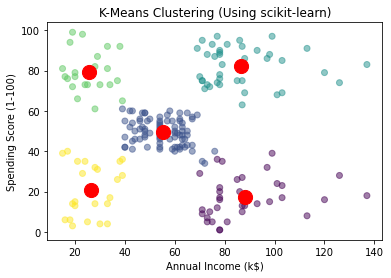

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', alpha=0.5)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='o', s=200, color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (Using scikit-learn)')
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

print("Centroids (Scratch):")
print(centroids_scratch)
print("\nCentroids (scikit-learn):")
print(centroids_sklearn)

print("\nCluster Assignments (Scratch):")
print(labels_scratch)
print("\nCluster Assignments (scikit-learn):")
print(labels_sklearn)

inertia_scratch = np.sum(np.min(np.sqrt(((X - centroids_scratch[:, np.newaxis])**2).sum(axis=2)), axis=0))
inertia_sklearn = kmeans_sklearn.inertia_
print("\nInertia (Scratch):", inertia_scratch)
print("Inertia (scikit-learn):", inertia_sklearn)

silhouette_scratch = silhouette_score(X, labels_scratch)
silhouette_sklearn = silhouette_score(X, labels_sklearn)
print("\nSilhouette Score (Scratch):", silhouette_scratch)
print("Silhouette Score (scikit-learn):", silhouette_sklearn)

Centroids (Scratch):
[[26.30434783 20.91304348]
 [87.75       17.58333333]
 [25.72727273 79.36363636]
 [55.0875     49.7125    ]
 [86.53846154 82.12820513]]

Centroids (scikit-learn):
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]

Cluster Assignments (Scratch):
[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 3 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 1 4 3 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 3 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]

Cluster Assignments (scikit-learn):
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## Comparison : 

1. The scratch implementation might be more effective in terms of clustering compactness (lower inertia).
2. The scikit-learn implementation might have produced more spread-out clusters (higher inertia).
3. Both implementations seem to have similar clustering quality, as indicated by their similar silhouette scores.


If we prioritize computational efficiency and ease of use, scikit-learn's implementation might be preferable. However, if we need more control over the implementation or better clustering compactness, we might consider using the scratch implementation.